# **Data Science and Business Analytics Task 2**

Given the 'iris' dataset, predict the optimum number of clusters and represent it visually.

**Name: Srijan Gupta**

**Organization: The Sparks Foundation**

**GRIPNOV20**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading the dataset and using the head function to have a look at the first 5 values in the dataset

In [2]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Using the pair plot feature to look at how the different clusters relate to different properties of the dataset

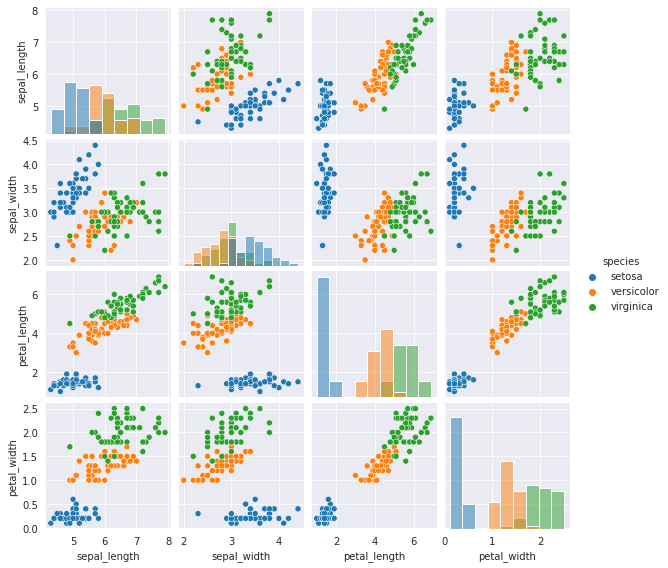

In [13]:
sns.set_style('darkgrid')
sns.pairplot(data=iris,hue='species',kind='scatter',diag_kind='hist',aspect=1,height=2)

Preparing the data

In [18]:
data=iris.drop('species',axis=1)
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
X = data.iloc[:,:].values
print(X.shape)

(150, 4)


Using the scikit learn module to implement the K Means Cluster Algorithm to get different number of clusters.
After fitting the data we store the sum of squared distance (SSE) between data points and their assigned clusters’ centroids.
We then use the elbow method to determine the best value for k.
In the elbow method, we plot the values of SSE that we got after using different k values in the kmeans clustering algo. We pick k at the spot where SSE starts to flatten out and forming an elbow.

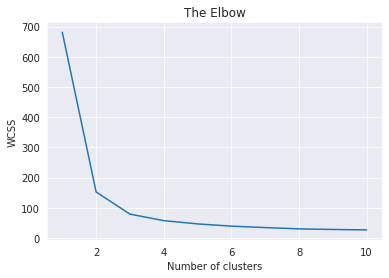

In [24]:
wcss=[]
from sklearn.cluster import KMeans

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results to show the elbow
plt.plot(range(1,11),wcss)
plt.title('The Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above graph it is clear that the graph starts to flatten after a k value of 3

For better analysis, we will plot the 3 nearest values when we see the graph flattening i.e 2, 3 and 4 along with their centroids

In [26]:
kmeans1 = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans1 = kmeans1.fit_predict(X)
y_kmeans1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Text(0.5, 1.0, 'Clustering with k=2')

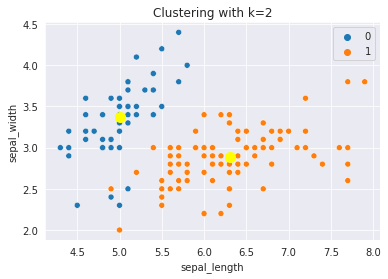

In [36]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y_kmeans1)
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Clustering with k=2')

Text(0.5, 1.0, 'Clustering with k=4')

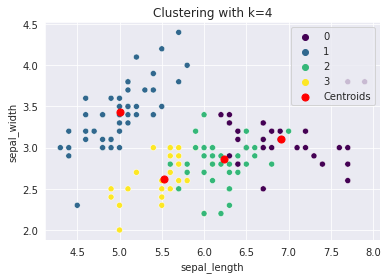

In [44]:
kmeans2 = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans2 = kmeans2.fit_predict(X)
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y_kmeans2,palette='viridis')
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:,1], 
            s = 50, c = 'red', label = 'Centroids')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(loc='best')
plt.title('Clustering with k=4')

Text(0.5, 1.0, 'Clustering with k=3')

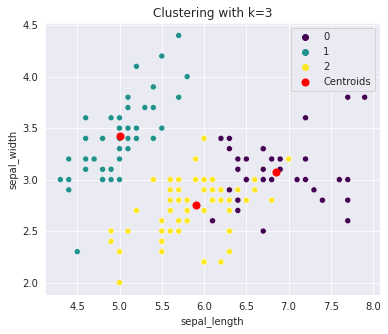

In [49]:
kmeans3 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans3 = kmeans3.fit_predict(X)
plt.figure(figsize=(6,5))
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y_kmeans3,palette='viridis')
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:,1], 
            s = 50, c = 'red', label = 'Centroids')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(loc='best')
plt.title('Clustering with k=3')